# Project 01

**Submitted by: Diego Sol**

CSCE 636-600: Deep Learning

Professor: Dr. Anxiao Jiang

# Initialization

**This section includes mounting the session to Google Drive, importing necessary packages to run the file, and downloading the training datasets.**

Mount Google Drive to this notebook to easily access training data

In [35]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Import packages

In [36]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from IPython.core.pylabtools import figsize

Download training images and labels

In [37]:
all_images = pickle.load(open('/content/drive/MyDrive/Colab Notebooks/CSCE_636_Project_1/636_project1_train_images', 'rb'))
all_labels = pickle.load(open('/content/drive/MyDrive/Colab Notebooks/CSCE_636_Project_1/636_project1_train_labels', 'rb'))

# Baseline Model

**This model consists of a simple convolutional neural network. It will utilize a portion of the imported data for training and validation, while reserving a small amount for testing.**

## Manipulating the data

Split the data into training and testing sets

In [38]:
data_split = 50000

train_images = all_images[:data_split,:,:]
train_labels = all_labels[:data_split,]

test_images = all_images[data_split:,:,:]
test_labels = all_labels[data_split:,]

Plot random images with labels to visualize the training data

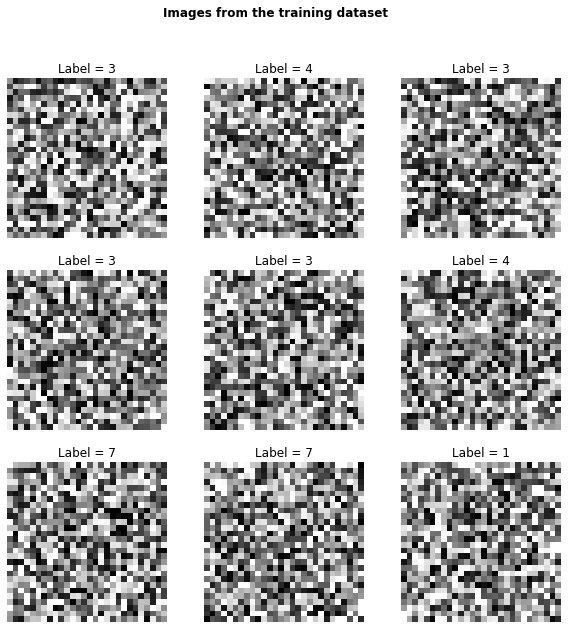

In [39]:
# create figure to randomly display training data
fig1, ax1 = plt.subplots(3,3,figsize=(10,10))
fig1.suptitle("Images from the training dataset", fontweight="bold")

for ii in range(9):
  # generate random number in training set
  n = np.random.choice(data_split)

  # plot training images to subplot
  ax1 = plt.subplot(3, 3, ii + 1)
  ax1.set_title(f"Label = {train_labels[n]}")
  plt.imshow(train_images[n], cmap=plt.cm.binary)
  plt.axis('off')

plt.show()

## Creating the model

Create a simple convolutional neural network

In [40]:
inputs = keras.Input(shape=(28, 28, 1))

x = layers.Rescaling(1./255) (inputs)

# convolutional and  max pooling layers
x = layers.Conv2D(32, 3, activation="relu") (x)
x = layers.MaxPooling2D(pool_size=2) (x)
x = layers.Conv2D(64, 3, activation="relu") (x)
x = layers.MaxPooling2D(pool_size=2) (x)

x = layers.Flatten() (x)
x = layers.Dropout(0.5) (x)

outputs = layers.Dense(10, activation="softmax")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(optimizer="rmsprop",
            loss="sparse_categorical_crossentropy",
            metrics=["accuracy"])

model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 rescaling_3 (Rescaling)     (None, 28, 28, 1)         0         
                                                                 
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                       

Use callbacks to save the best model

In [41]:
callbacks_list = [
                  keras.callbacks.ModelCheckpoint(
                      filepath="baseline_model.keras",
                      monitor="val_loss",
                      save_best_only=True
                  )]

Train the model

In [42]:
history = model.fit(train_images,
                    train_labels,
                    epochs=50,
                    validation_split=0.4,
                    batch_size=32,
                    verbose=1,
                    callbacks=callbacks_list)

Epoch 1/50
938/938 [==============================] - 6s 6ms/step - loss: 2.1990 - accuracy: 0.1903 - val_loss: 1.9618 - val_accuracy: 0.3210
Epoch 2/50
938/938 [==============================] - 5s 5ms/step - loss: 1.9164 - accuracy: 0.3205 - val_loss: 1.7685 - val_accuracy: 0.3884
Epoch 3/50
938/938 [==============================] - 5s 5ms/step - loss: 1.7032 - accuracy: 0.4128 - val_loss: 1.5264 - val_accuracy: 0.4793
Epoch 4/50
938/938 [==============================] - 5s 5ms/step - loss: 1.5677 - accuracy: 0.4626 - val_loss: 1.4786 - val_accuracy: 0.5047
Epoch 5/50
938/938 [==============================] - 5s 5ms/step - loss: 1.4790 - accuracy: 0.4928 - val_loss: 1.3603 - val_accuracy: 0.5383
Epoch 6/50
938/938 [==============================] - 5s 5ms/step - loss: 1.4176 - accuracy: 0.5156 - val_loss: 1.3485 - val_accuracy: 0.5425
Epoch 7/50
938/938 [==============================] - 5s 5ms/step - loss: 1.3798 - accuracy: 0.5287 - val_loss: 1.3099 - val_accuracy: 0.5645
Epoch 

## Training perfomance

In [43]:
# history data
history_dict = history.history

# training metric history
train_loss_values = history_dict["loss"]
train_acc_values = history_dict["accuracy"]

# validation metric history
val_loss_values = history_dict["val_loss"]
val_acc_values = history_dict["val_accuracy"]

# epochs
epochs = range(1, len(train_loss_values) + 1)

Plot training and validation loss

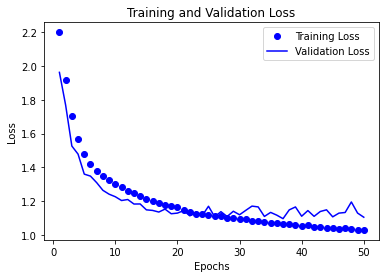

In [44]:
# create figure for training and validation loss
fig2, ax2 = plt.subplots()

# plot
ax2.plot(epochs, train_loss_values, "bo", label="Training Loss")
ax2.plot(epochs, val_loss_values, "b", label="Validation Loss")
ax2.set_title("Training and Validation Loss")
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Loss")
ax2.legend()
plt.show()

Plot training and validation accuracy

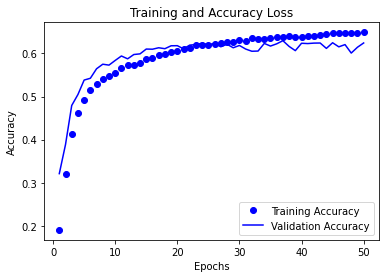

In [45]:
# create figure for training data
fig3, ax3 = plt.subplots()

# plot
ax3.plot(epochs, train_acc_values, "bo", label="Training Accuracy")
ax3.plot(epochs, val_acc_values, "b", label="Validation Accuracy")
ax3.set_title("Training and Accuracy Loss")
ax3.set_xlabel("Epochs")
ax3.set_ylabel("Accuracy")
ax3.legend()
plt.show()

## Test performance

Evaluate the model on the test set

In [46]:
# print final results
results = model.evaluate(test_images, test_labels)
print(f'Network loss:     {results[0]}')
print(f'Network accuracy: {results[1]}')

313/313 [==============================] - 1s 3ms/step - loss: 1.1205 - accuracy: 0.6141
Network loss:     1.1204997301101685
Network accuracy: 0.6140999794006348


Plot images from test set, as well as their associated truth and predicted labels

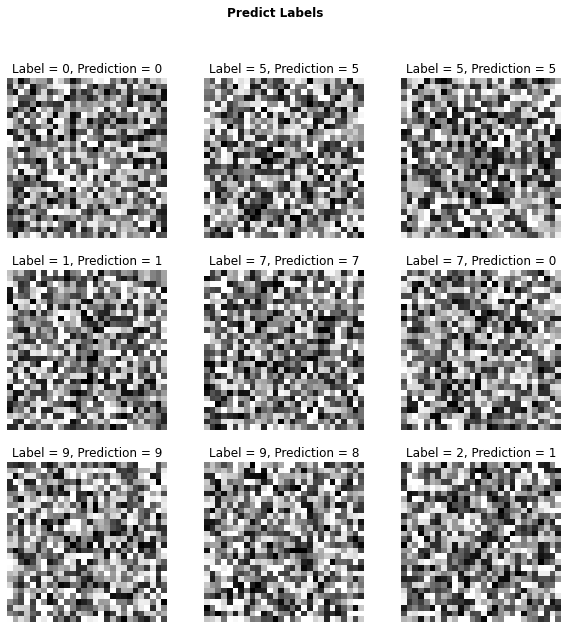

In [47]:
# make predictions on the test set
predictions = model.predict(test_images)

# create figure to randomly display predicted test data
fig4, ax4 = plt.subplots(3,3,figsize=(10,10))
fig4.suptitle("Predict Labels", fontweight="bold")

for ii in range(9):
  # generate random number in test set
  n = np.random.choice(60000 - data_split)

  # plot test images to subplot
  pred = predictions[n].argmax()
  ax4 = plt.subplot(3, 3, ii + 1)
  ax4.set_title(f"Label = {test_labels[n]}, Prediction = {pred}")
  plt.imshow(test_images[n], cmap=plt.cm.binary)
  plt.axis('off')

plt.show()

# Updated Model

Create a data augmentation layer

In [48]:
data_augmentation = keras.Sequential([
        layers.RandomRotation(np.pi),
        layers.RandomZoom(0.2),
        layers.RandomFlip('horizontal')
    ])

# data_augmentation.build(input_shape=(28,28))
# data_augmentation.summary()

## Creating the updated model

Create a convolutional model that includes data augmentation

In [49]:
inputs = keras.Input(shape=(28, 28, 1))

# x = data_augmentation(inputs)
x = layers.Rescaling(1./255) (inputs)

# convolutional and  max pooling layers
x = layers.Conv2D(32, 3, activation="relu") (x)
x = layers.MaxPooling2D(pool_size=2) (x)
x = layers.Conv2D(64, 3, activation="relu") (x)
x = layers.MaxPooling2D(pool_size=2) (x)

x = layers.Flatten() (x)
x = layers.Dropout(0.5) (x)

outputs = layers.Dense(10, activation="softmax")(x)

updated_model = keras.Model(inputs=inputs, outputs=outputs)

updated_model.compile(optimizer="rmsprop",
            loss="sparse_categorical_crossentropy",
            metrics=["accuracy"])

updated_model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 rescaling_4 (Rescaling)     (None, 28, 28, 1)         0         
                                                                 
 conv2d_8 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                       

In [52]:
# fig5, ax5 = plt.subplots(1,1,figsize=(10,10))

# for ii in range(9):
#   augmented_images = data_augmentation(train_images)[:,:,:,0]
#   ax = plt.subplot(3, 3, ii + 1)
#   plt.imshow(augmented_images[0], cmap=plt.cm.binary)
#   plt.axis("off")

# # fig6, ax6 = plt.subplots(1,1,figsize=(10,10))
# # plt.imshow(train_images[0], cmap=plt.cm.binary)
# # plt.axis("off")

In [53]:
updated_callbacks_list = [
                  keras.callbacks.ModelCheckpoint(
                      filepath="updated_model.keras",
                      monitor="val_loss",
                      save_best_only=True
                  )]

In [54]:
updated_history = updated_model.fit(all_images,
                                    all_labels,
                                    epochs=50,
                                    validation_split=0.4,
                                    batch_size=32,
                                    verbose=1,
                                    callbacks=updated_callbacks_list)

Epoch 1/50
1125/1125 [==============================] - 7s 5ms/step - loss: 2.1778 - accuracy: 0.1981 - val_loss: 1.9222 - val_accuracy: 0.3356
Epoch 2/50
1125/1125 [==============================] - 6s 5ms/step - loss: 1.8478 - accuracy: 0.3548 - val_loss: 1.7006 - val_accuracy: 0.4154
Epoch 3/50
1125/1125 [==============================] - 6s 5ms/step - loss: 1.6234 - accuracy: 0.4381 - val_loss: 1.4946 - val_accuracy: 0.4936
Epoch 4/50
1125/1125 [==============================] - 6s 5ms/step - loss: 1.5097 - accuracy: 0.4813 - val_loss: 1.4000 - val_accuracy: 0.5267
Epoch 5/50
1125/1125 [==============================] - 6s 5ms/step - loss: 1.4422 - accuracy: 0.5079 - val_loss: 1.3152 - val_accuracy: 0.5585
Epoch 6/50
1125/1125 [==============================] - 6s 5ms/step - loss: 1.3910 - accuracy: 0.5241 - val_loss: 1.3705 - val_accuracy: 0.5500
Epoch 7/50
1125/1125 [==============================] - 6s 5ms/step - loss: 1.3553 - accuracy: 0.5371 - val_loss: 1.2922 - val_accuracy:

## Training performance

In [55]:
# history data
updated_history_dict = updated_history.history

# training metric history
updated_train_loss_values = updated_history_dict["loss"]
updated_train_acc_values = updated_history_dict["accuracy"]

# validation metric history
updated_val_loss_values = updated_history_dict["val_loss"]
updated_val_acc_values = updated_history_dict["val_accuracy"]

# epochs
epochs = range(1, len(updated_train_loss_values) + 1)

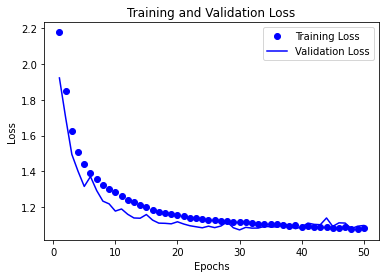

In [56]:
# create figure for training and validation loss
fig3, ax3 = plt.subplots()

# plot
ax3.plot(epochs, updated_train_loss_values, "bo", label="Training Loss")
ax3.plot(epochs, updated_val_loss_values, "b", label="Validation Loss")
ax3.set_title("Training and Validation Loss")
ax3.set_xlabel("Epochs")
ax3.set_ylabel("Loss")
ax3.legend()
plt.show()

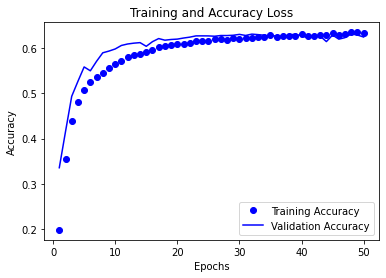

In [57]:
# create figure for training data
fig3, ax3 = plt.subplots()

# plot
ax3.plot(epochs, updated_train_acc_values, "bo", label="Training Accuracy")
ax3.plot(epochs, updated_val_acc_values, "b", label="Validation Accuracy")
ax3.set_title("Training and Accuracy Loss")
ax3.set_xlabel("Epochs")
ax3.set_ylabel("Accuracy")
ax3.legend()
plt.show()

In [58]:
# print final results
results = updated_model.evaluate(test_images, test_labels)
print(f'Network loss:     {results[0]}')
print(f'Network accuracy: {results[1]}')

313/313 [==============================] - 1s 3ms/step - loss: 1.1065 - accuracy: 0.6204
Network loss:     1.1064506769180298
Network accuracy: 0.6204000115394592


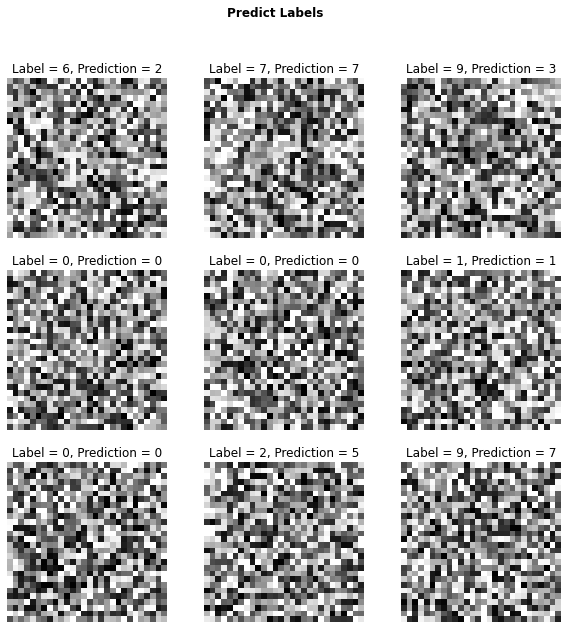

In [59]:
# make predictions on the test set
updated_predictions = updated_model.predict(test_images)

# create figure to randomly display predicted test data
fig4, ax4 = plt.subplots(3,3,figsize=(10,10))
fig4.suptitle("Predict Labels", fontweight="bold")

for ii in range(9):
  # generate random number in test set
  n = np.random.choice(60000 - data_split)

  # plot test images to subplot
  pred = updated_predictions[n].argmax()
  ax4 = plt.subplot(3, 3, ii + 1)
  ax4.set_title(f"Label = {test_labels[n]}, Prediction = {pred}")
  plt.imshow(test_images[n], cmap=plt.cm.binary)
  plt.axis('off')

plt.show()